In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def parse_gro_file(gro_file_path):
    with open(gro_file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip header and last line (box vectors)
    atom_lines = lines[2:-1]

    # Initialize min and max coordinates
    min_coords = [float('inf'), float('inf'), float('inf')]
    max_coords = [-float('inf'), -float('inf'), -float('inf')]

    for line in atom_lines:
        # Extract coordinates
        x, y, z = float(line[20:28]), float(line[28:36]), float(line[36:44])

        # Update min and max coordinates
        min_coords = [min(min_coords[i], coord) for i, coord in enumerate([x, y, z])]
        max_coords = [max(max_coords[i], coord) for i, coord in enumerate([x, y, z])]

    min_coords=np.array(min_coords)*10
    max_coords=np.array(max_coords)*10
    return min_coords, max_coords

# Replace 'your_file.gro' with the path to your GRO file
min_coordinates, max_coordinates = parse_gro_file('../gromacs3/topology/processed.gro')

print("Minimum coordinates:", min_coordinates)
print("Maximum coordinates:", max_coordinates)
max_coordinates-min_coordinates

Minimum coordinates: [ 6.2  16.03 91.35]
Maximum coordinates: [ 17.03  26.58 180.97]


array([10.83, 10.55, 89.62])

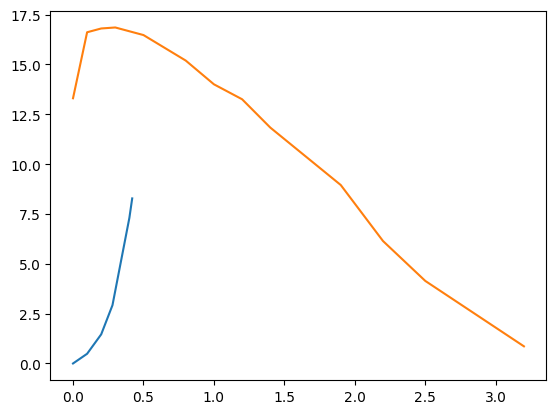

In [3]:
points=[0, 0.00,
0.10, 0.487,
0.20, 1.461,
0.28, 2.922,
0.32, 4.383,
0.36, 5.843,
0.40, 7.304,
0.42, 8.278]

plt.plot(points[0::2],points[1::2])

points_2=[0, 13.3,
0.1, 16.61,
0.2, 16.8,
0.3, 16.85,
0.5, 16.47,
0.8, 15.19,
1.0, 14,
1.2, 13.25,
1.4, 11.83,
1.9, 8.95,
2.2, 6.14,
2.5, 4.14,
3.2, 0.86]

plt.plot(points_2[0::2],points_2[1::2])


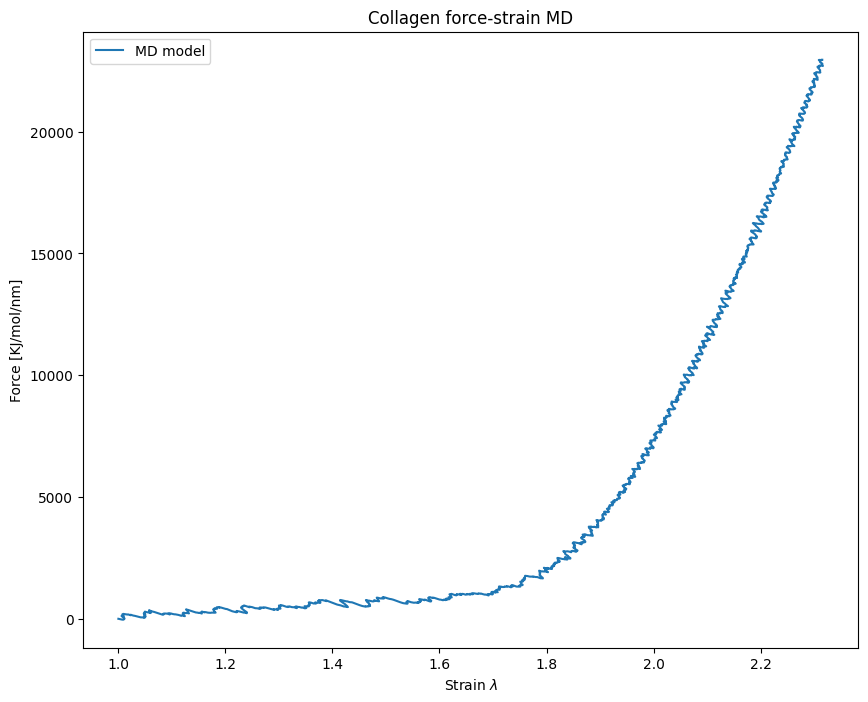

In [4]:
# Replace this with your .xvg file path
path_for = '../gromacs3/md_5_0/md_pullf.xvg'

# Read the file, skipping the header
data_for = pd.read_csv(path_for, delim_whitespace=True, comment='@', header=None, skiprows=17)

path_dis = '../gromacs3/md_5_0/md_pullx.xvg'

# Read the file, skipping the header
data_dis = pd.read_csv(path_dis, delim_whitespace=True, comment='@', header=None, skiprows=17)

# Assuming the first column is time, the second is force/displacement
time = data_dis[0]

# Perform your analysis here
# For example, calculating the average:
# plt.plot(time,data_for[1])
# plt.show()

plt.figure(1,figsize=(10,8))
plt.title('Collagen force-strain MD')
plt.plot(data_dis[1]/data_dis[1][0],data_for[1],label='MD model')
plt.xlabel('Strain $\lambda$')
plt.ylabel('Force [KJ/mol/nm]')
plt.legend()
plt.savefig('./figs/md_force-strain')

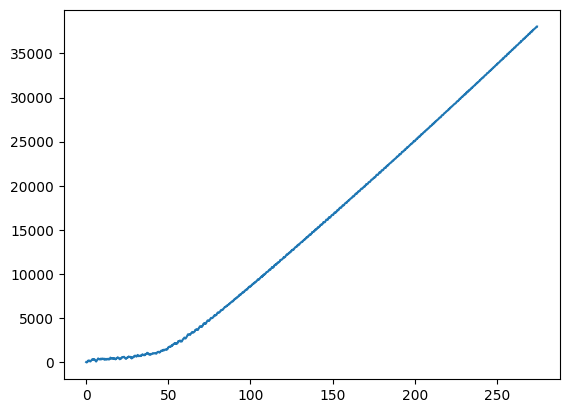

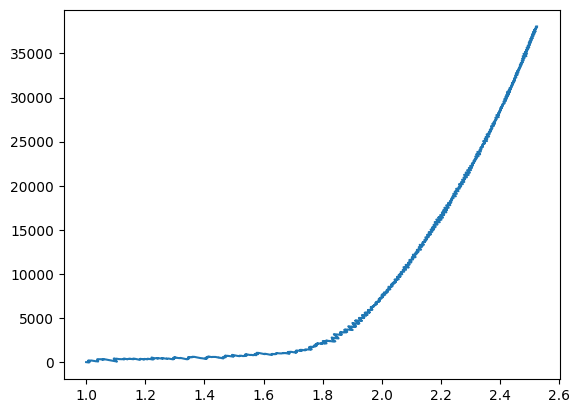

In [5]:
# Replace this with your .xvg file path
path_for = '../gromacs3/md_2_1/md_pullf.xvg'

# Read the file, skipping the header
data_for = pd.read_csv(path_for, delim_whitespace=True, comment='@', header=None, skiprows=17)

path_dis = '../gromacs3/md_2_1/md_pullx.xvg'

# Read the file, skipping the header
data_dis = pd.read_csv(path_dis, delim_whitespace=True, comment='@', header=None, skiprows=17)

# Assuming the first column is time, the second is force/displacement
time = data_dis[0]

# Perform your analysis here
# For example, calculating the average:
plt.plot(data_for[0],data_for[1])
plt.show()
plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1])

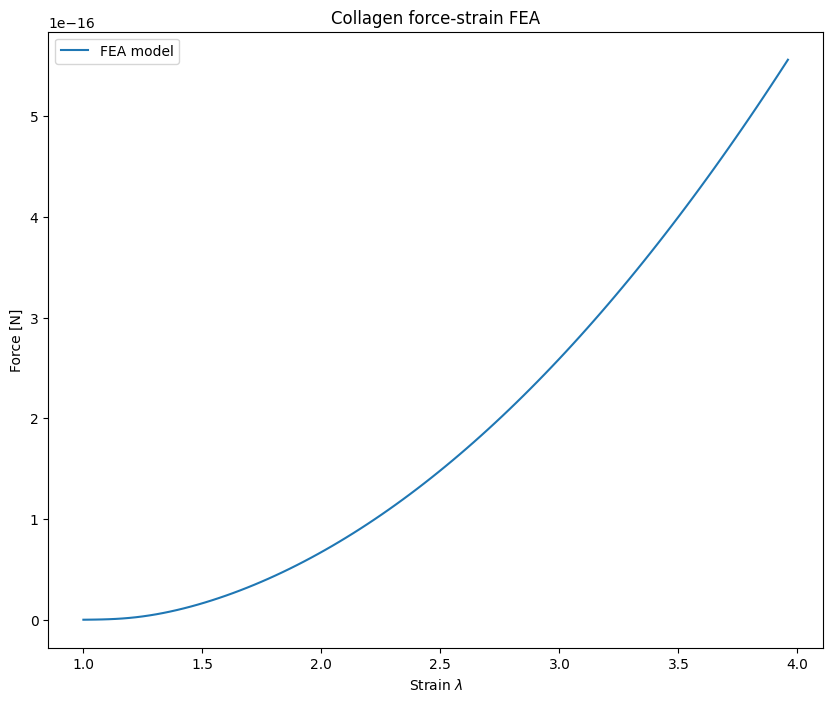

In [6]:
avogadros_number = 6.022e23  # particles per mole

# Conversion factor from kJ/mol/nm to N
conversion_factor = 1000 / avogadros_number  # N/nm

plt.figure(figsize=(10,8))

# plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1]*conversion_factor,label='MD model')

plot_abaqus=pd.read_csv('./abaqus/stress_strain_extenso_2.csv')
# plot_abaqus=plot_abaqus[:-66]

# plot_abaqus=pd.read_csv('./abaqus/stress_data_both.csv')

plt.plot(1+plot_abaqus['0']/90,plot_abaqus['0.1']*10**-18, label='FEA model')
# plt.plot(1+plot_abaqus['0.2'],plot_abaqus['0.3'],'o',label='Data')

plt.ylabel('Force [N]')
plt.xlabel('Strain $\lambda$')

plt.title('Collagen force-strain FEA')
plt.legend()
plt.savefig('./figs/force_strain_only_FEA')


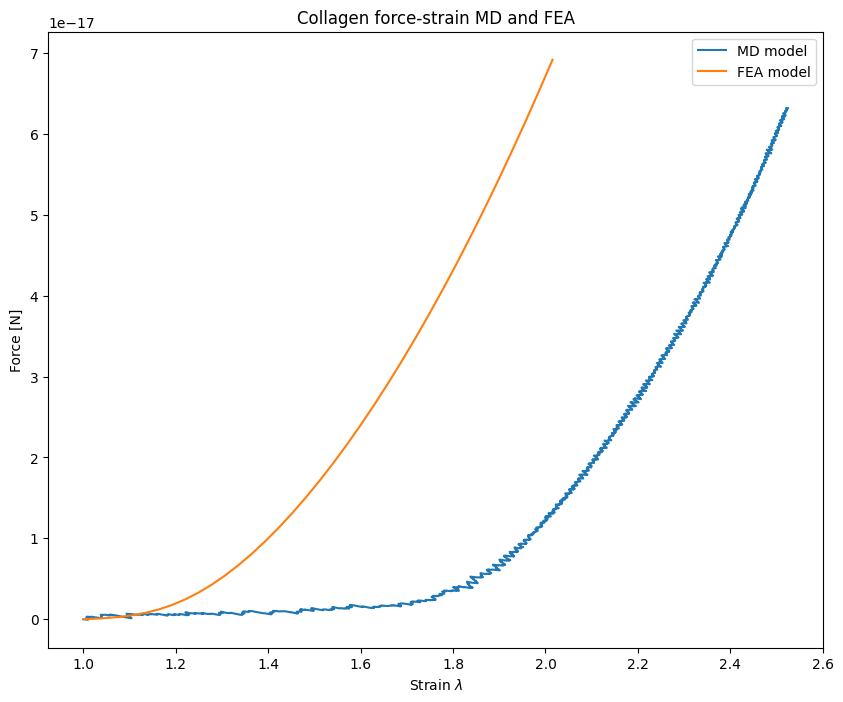

In [7]:
avogadros_number = 6.022e23  # particles per mole

# Conversion factor from kJ/mol/nm to N
conversion_factor = 1000 / avogadros_number  # N/nm

plt.figure(figsize=(10,8))

plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1]*conversion_factor,label='MD model')

plot_abaqus=pd.read_csv('./abaqus/stress_strain_extenso_2.csv')
plot_abaqus=plot_abaqus[:-66]

plt.plot(1+plot_abaqus['0']/90,plot_abaqus['0.1']*10**-18,label='FEA model')

plt.ylabel('Force [N]')
plt.xlabel('Strain $\lambda$')

plt.title('Collagen force-strain MD and FEA')
plt.legend()
plt.savefig('./figs/force_strain')

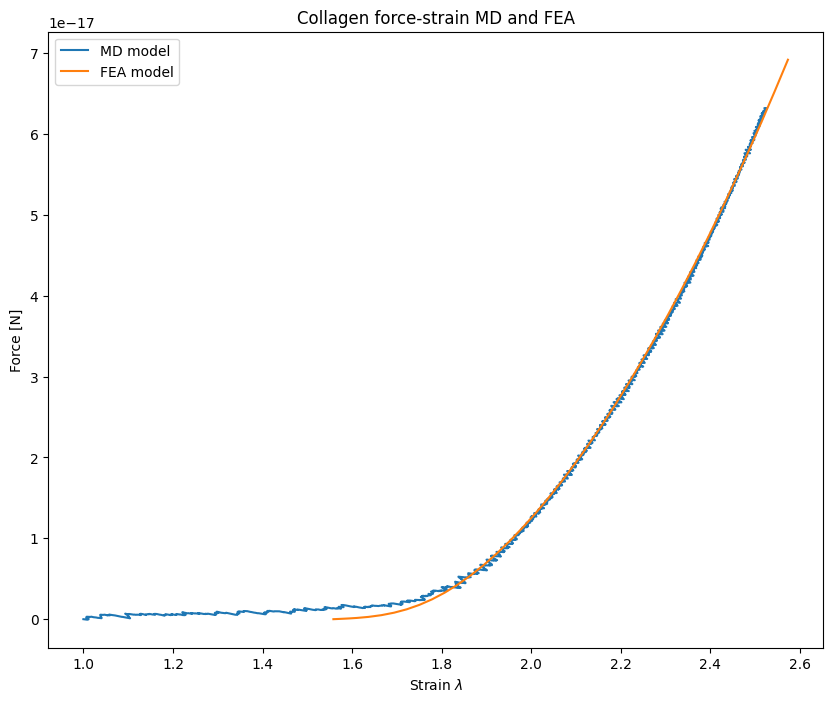

In [8]:
avogadros_number = 6.022e23  # particles per mole

# Conversion factor from kJ/mol/nm to N
conversion_factor = 1000 / avogadros_number  # N/nm

plt.figure(figsize=(10,8))
plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1]*conversion_factor,label='MD model')

plot_abaqus=pd.read_csv('./abaqus/stress_strain_extenso_2.csv')
plot_abaqus=plot_abaqus[:-66]

plt.plot(1.558+plot_abaqus['0']/90,plot_abaqus['0.1']*10**-18,label='FEA model')

plt.ylabel('Force [N]')
plt.xlabel('Strain $\lambda$')

plt.title('Collagen force-strain MD and FEA')
plt.legend()
plt.savefig('./figs/force_strain_1_5')

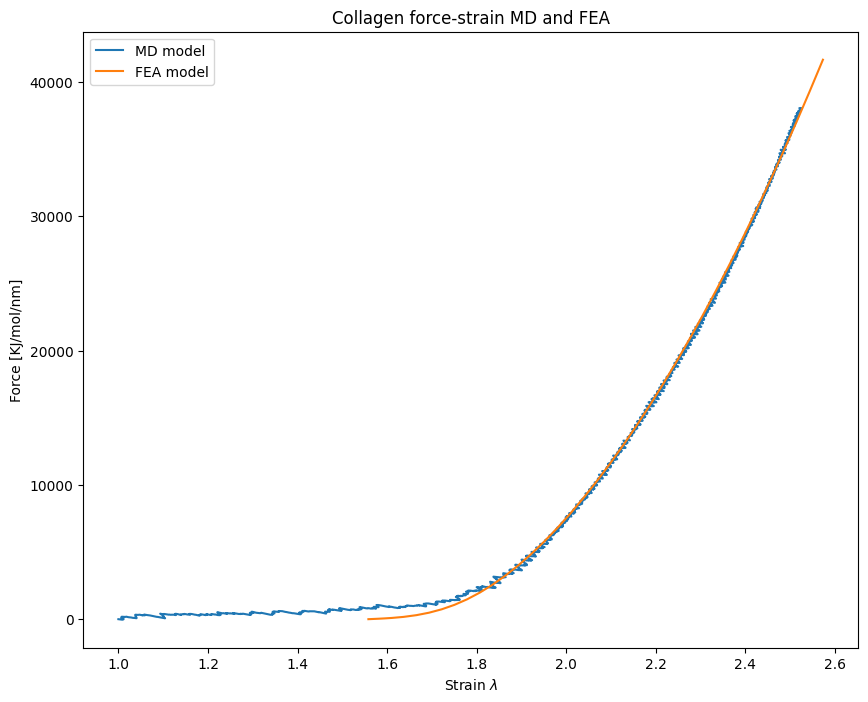

In [9]:
avogadros_number = 6.022e23  # particles per mole

# Conversion factor from kJ/mol/nm to N
conversion_factor = 1000 / avogadros_number  # N/nm

plt.figure(figsize=(10,8))
plt.plot(data_dis[1][:-17]/data_dis[1][0],data_for[1],label='MD model')

plot_abaqus=pd.read_csv('./abaqus/stress_strain_extenso_2.csv')
plot_abaqus=plot_abaqus[:-66]

plt.plot(1.558+plot_abaqus['0']/90,plot_abaqus['0.1']*10**-18/conversion_factor,label='FEA model')

plt.ylabel('Force [KJ/mol/nm]')
plt.xlabel('Strain $\lambda$')

plt.title('Collagen force-strain MD and FEA')
plt.legend()
plt.savefig('./figs/force_strain_1_5_KJ')

In [10]:
def derivative(fun,x,N):

    df= (fun[-N]-fun[N])/(x[-N]-x[N])

    return df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.5027323693119827e-05


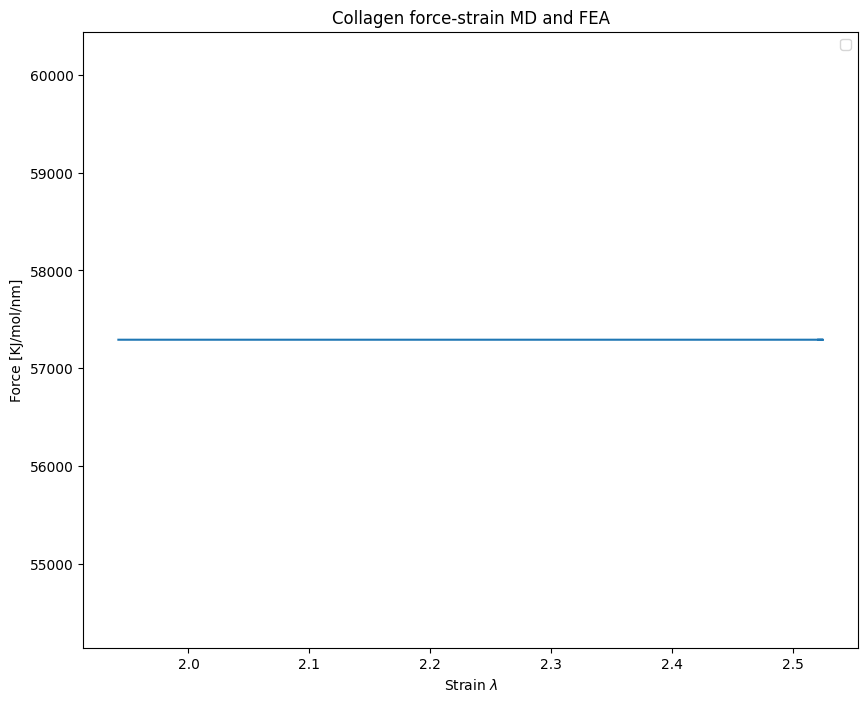

In [11]:
avogadros_number = 6.022e23  # particles per mole

# Conversion factor from kJ/mol/nm to N
conversion_factor = 1000 / avogadros_number  # N/nm

plt.figure(figsize=(10,8))

x=data_dis[1][:-17]/data_dis[1][0]
x=np.array(x)

y=data_for[1]
y=np.array(y)

N=800

print(derivative(y[800:],x[N:],10)*conversion_factor/(np.pi*1.1**2*10**(-12)))

plt.plot(x[N:],derivative(y[N:],x[N:],10)*np.ones_like(x[N:]))


plt.ylabel('Force [KJ/mol/nm]')
plt.xlabel('Strain $\lambda$')

plt.title('Collagen force-strain MD and FEA')
plt.legend()
plt.savefig('./figs/force_strain_derivarive')

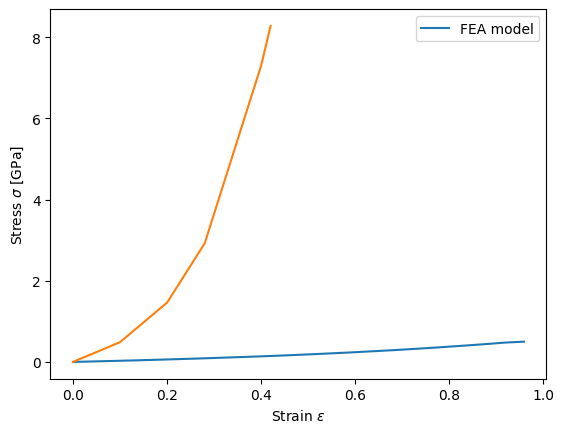

In [12]:
plot_abaqus=pd.read_csv('./abaqus/stress_strain.csv')
plt.plot(plot_abaqus['0'],plot_abaqus['0.1'],label='FEA model')

# plot_gromacs=pd.read_csv('./gromacs/stress_strain.csv')
# plt.plot(plot_gromacs[],plot_gromacs[],label='MD model')
points=[0, 0.00,
0.10, 0.487,
0.20, 1.461,
0.28, 2.922,
0.32, 4.383,
0.36, 5.843,
0.40, 7.304,
0.42, 8.278]

plt.plot(points[0::2],points[1::2])

plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $\sigma$ [GPa]')
plt.legend()

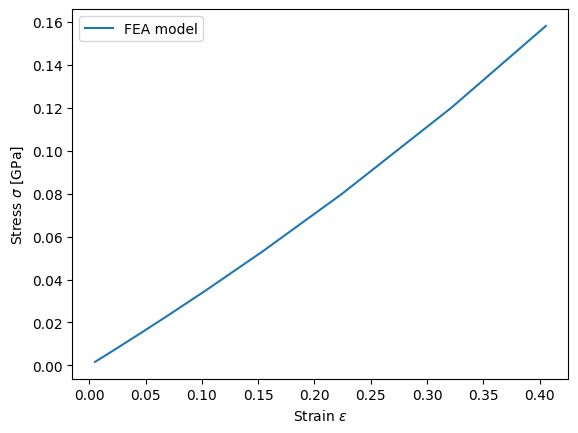

In [13]:
plot_abaqus=pd.read_csv('./abaqus/stress_strain_plot.csv')
plt.plot(plot_abaqus['0'],plot_abaqus['0.1'],label='FEA model')

# plot_gromacs=pd.read_csv('./gromacs/stress_strain.csv')
# plt.plot(plot_gromacs[],plot_gromacs[],label='MD model')

plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $\sigma$ [GPa]')
plt.legend()